# Have the movie genres get better as time passed?

## This project aims to brace up my knowledge with Data Science till now, involving the basics DS libraries: Numpy, Pandas e Matplotlib.

The movies genres will be segmented by movies' date releases and grouped by decade of releasing. The datetime of the ratings won't be considered.

The following dataset will be explored:

* **Data Source:** MovieLens web site (filename: ml-25m.zip)
* **Location:** [Movies dataset](https://grouplens.org/datasets/movielens/)

### Possible questions

* Improvement of a genre by the eyes of the users as time passed (avg rating each year/month) - (total = 19 genres)
* behavior of a specific movie since its release 


# Importing Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Exploring data

## Using UNIX to take a look on the data

In [ ]:
!ls ./movielens

In [ ]:
#!head -5 ./movielens/movies.csv
#!head -5 ./movielens/genome-scores.csv
#!head -5 ./movielens/genome-tags.csv
#!head -5 ./movielens/links.csv
#!head -5 ./movielens/ratings.csv
!head -5 ./movielens/tags.csv

# Using Pandas to explore the data

Reading CSVs

In [5]:
movie = pd.read_csv('./movielens/movies.csv', sep=',')
rating = pd.read_csv('./movielens/ratings.csv', sep=',')
#tag = pd.read_csv('./movielens/tags.csv', sep=',')

Timestamp into datetime

In [6]:
rating['datetime'] = pd.to_datetime(rating['timestamp'], unit='s')

Taking a look to the genres

In [7]:
movie_genres = movie['genres'].str.split('|', expand=True)

In [8]:
movie_genres_array = np.array(movie_genres)
movie_genres_single = pd.Series(movie_genres_array.reshape(movie_genres_array.size))

In [92]:
movie_genres_single.value_counts().sort_values(ascending=False)
# There's 19 unique genres

Drama                 25606
Comedy                16870
Thriller               8654
Romance                7719
Action                 7348
Horror                 5989
Documentary            5605
Crime                  5319
(no genres listed)     5062
Adventure              4145
Sci-Fi                 3595
Children               2935
Animation              2929
Mystery                2925
Fantasy                2731
War                    1874
Western                1399
Musical                1054
Film-Noir               353
IMAX                    195
dtype: int64

Creating a new column for release year

In [39]:
movie['release_year'] = movie['title'].str.extract('.*\((.*)\).*', expand=True)

In [43]:
unique_genres = movie_genres_single.sort_values(ascending=True).unique()[1:-1]
unique_genres = np.delete(unique_genres, np.where(unique_genres == 'IMAX'))
unique_genres
# Excluding '(no genres listed)', 'None' and 'IMAX'

array(['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War',
       'Western'], dtype=object)

Joining movies with ratings datasets

In [40]:
movie_rating = movie.merge(rating[['rating','datetime','movieId']], on='movieId', how='left')
#movie_tag = movie.merge(tag[['tag','timestamp','movieId']], on='movieId', how='left') 

# Data Cleaning

In [48]:
# Is there any null rating?
movie_rating.isnull().any()

movieId         False
title           False
genres          False
release_year     True
rating           True
datetime         True
dtype: bool

In [54]:
# Checking if drop rows as a data cleaning method is ok 
# Hypothesis: if they represent just a small part of the dataset, then it is ok to drop them
null_ratings = movie_rating[movie_rating.release_year.isnull()].count()
total_rows = movie_rating.count()
r_null_ratings = (null_ratings[0]/total_rows[0])*100

In [55]:
print("Null rating rows represent %.3f %%" %(r_null_ratings))

Null rating rows represent 0.046 %


In [56]:
# Drop the rows in which the rating is null
null_movies = movie_rating[movie_rating.rating.isnull()]
movie_rating.dropna(axis=0, inplace=True)

In [57]:
# Checking if still there is any movie withou a rating
movie_rating.isnull().any()

movieId         False
title           False
genres          False
release_year    False
rating          False
datetime        False
dtype: bool

## Data Analysis

In [61]:
# Creating a new df with numeric values of release_year
movie_rating_valid = pd.DataFrame(movie_rating[movie_rating.release_year.str.isnumeric()])

In [141]:
# Creating empty dfs to store count and mean ratings
years =  movie_rating_valid['release_year']
avg_rating_over_year_count = pd.DataFrame(index=np.sort(np.array([year for year in years.unique()])))
avg_rating_over_year_mean = pd.DataFrame(index=np.sort(np.array([year for year in years.unique()])))

In [142]:
# Iterating to get count
# PS: it needs optimization
for genre in unique_genres:
    movie_filter = movie_rating_valid['genres'].str.contains(genre)
    avg_rating_genre = movie_rating_valid[['release_year','rating']][movie_filter].groupby('release_year').count()
    avg_rating_over_year_count[genre] = avg_rating_genre

In [144]:
avg_rating_over_year_count

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,decade
1928,28,4,1300,1297,2515,55,6,1919,22,3,59,1282,16,736,5,24,142,76,1920
1932,66,502,151,19,1827,2667,2,4124,296,314,3825,76,292,3615,157,404,424,8,1930
1936,78,159,139,28,8740,975,11,6910,29,181,207,985,626,9380,313,853,85,24,1930
1938,4012,3780,189,2045,6906,557,56,7163,2005,470,8,130,2335,9937,9,2744,358,21,1930
1940,338,1551,25121,25082,19262,143,13,24134,25374,1194,472,25327,6072,18956,300,6095,4546,589,1940
1942,437,930,8148,7995,5475,555,24,40620,924,305,836,2288,1143,30171,19,1911,2794,73,1940
1943,411,1110,281,387,786,2707,53,5997,488,133,1570,637,432,1640,32,3273,1905,780,1940
1944,302,1123,83,327,7758,9254,83,12616,118,9344,783,2467,9882,1633,23,10980,3361,28,1940
1946,44,1357,1591,17151,594,7398,7,24120,16868,13796,107,1725,7185,23466,1,6295,1952,882,1940
1948,6196,6630,261,393,2005,7613,6,20191,745,4771,922,1084,470,1393,10,7345,260,6454,1940


In [67]:
# Iterating to get count
# PS: it needs optimization
for genre in unique_genres:
    movie_filter = movie_rating_valid['genres'].str.contains(genre)
    avg_rating_genre = movie_rating_valid[['release_year','rating']][movie_filter].groupby('release_year').mean()
    avg_rating_over_year_mean[genre] = avg_rating_genre

In [80]:
avg_rating_over_year_mean

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1928,3.464286,3.500000,3.440769,3.441789,3.605765,3.336364,2.666667,3.776186,2.840909,4.166667,3.254237,3.445398,3.875000,3.783967,2.100000,3.458333,3.492958,3.447368
1932,3.083333,3.347610,3.238411,3.289474,3.799124,3.726284,3.000000,3.675194,3.646959,3.818471,3.492026,3.460526,3.243151,3.504149,3.181529,3.305693,3.520047,1.625000
1936,3.076923,3.154088,3.194245,3.410714,3.987071,3.683590,2.863636,3.910781,2.896552,3.806630,2.975845,3.602538,3.775559,3.974307,3.317891,3.558617,2.970588,2.583333
1938,3.857802,3.861508,3.285714,3.810269,3.876919,3.630162,3.660714,3.793034,3.816958,3.751064,2.937500,3.184615,4.025482,3.919191,3.111111,3.998724,3.568436,2.571429
1940,3.458580,3.561896,3.596652,3.597700,4.031383,2.853147,1.807692,4.009364,3.597482,3.779732,2.713983,3.594346,4.001400,4.050855,2.638333,4.009434,4.038935,3.275891
1942,3.264302,3.487097,3.496686,3.498499,3.828311,3.478378,2.770833,4.002413,3.514610,3.614754,3.138158,3.774913,3.557305,4.149813,2.526316,3.607797,3.748210,2.856164
1943,3.435523,3.506306,3.007117,3.024548,3.293257,4.033062,3.113208,3.809655,3.610656,3.131579,3.214331,3.438776,3.159722,3.669512,2.640625,3.932783,3.608136,3.544872
1944,3.220199,3.914515,3.150602,3.535168,3.964166,4.107791,3.493976,3.954344,3.233051,4.101937,3.015326,3.660722,4.021554,3.809553,2.239130,4.006284,3.786373,2.910714
1946,2.863636,3.568902,3.521684,3.982217,3.499158,4.044945,3.928571,3.952840,4.023773,4.073500,2.906542,3.506957,4.069659,4.034880,2.500000,4.052184,4.048156,3.620748
1948,4.067140,4.040950,3.168582,3.296438,3.471322,3.876461,2.750000,3.956639,3.881879,3.824460,3.422451,3.737546,3.592553,3.736899,2.750000,3.898434,3.559615,4.046405


In [79]:
# Dropping rows with null values
avg_rating_over_year_mean.dropna(axis=0,inplace=True)
#avg_rating_over_year_count.dropna(axis=0,inplace=True)

In [135]:
# Creating decade groups
avg_rating_over_year_mean['decade'] = avg_rating_over_year_mean.index.map(lambda x: (int(x)//10*10))

In [ ]:
avg_rating_over_decade = avg_rating_over_year_mean.groupby('decade').mean()

## Data Visualisation

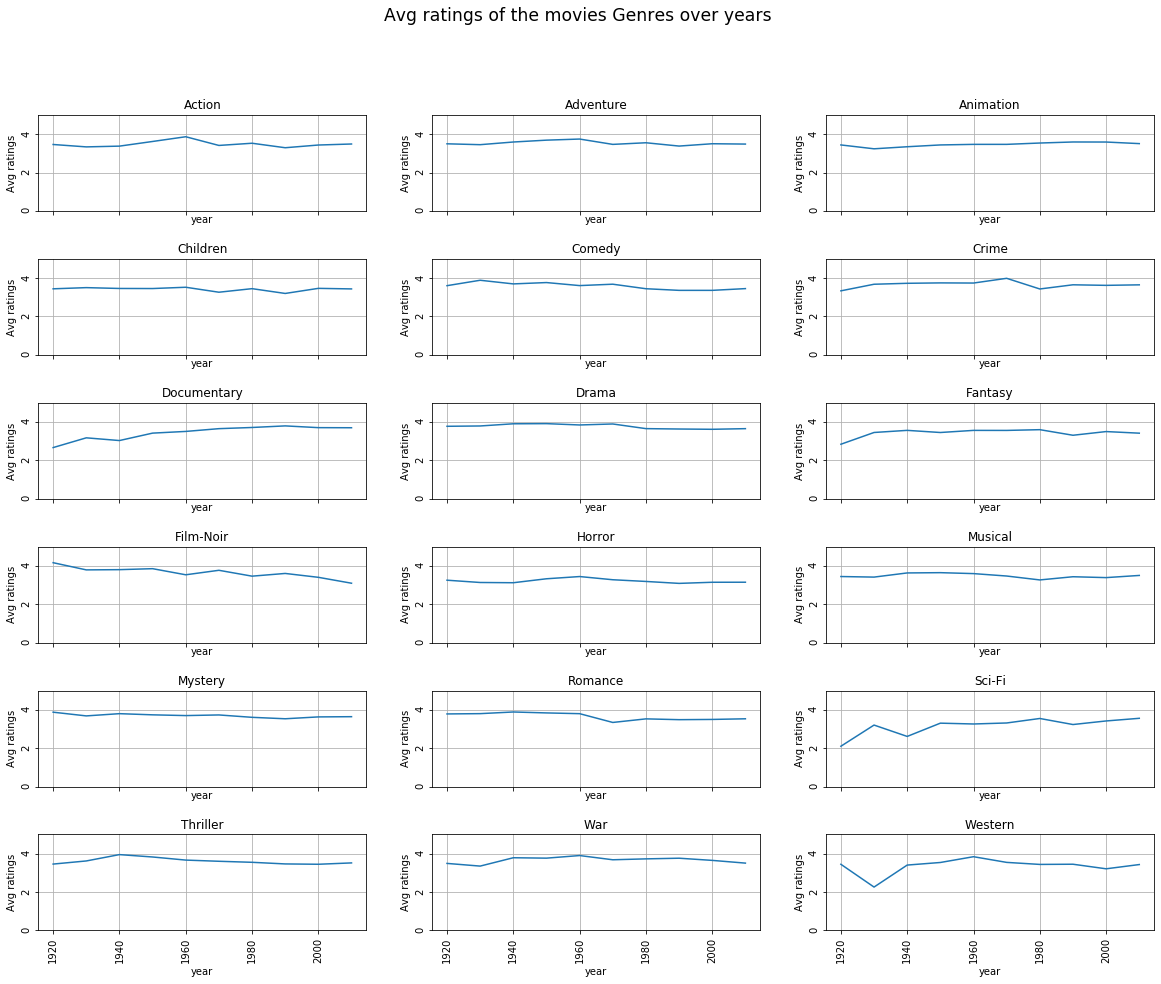

In [140]:
subplot_rows = 6
subplot_columns = 3

fig, axs = plt.subplots(subplot_rows,subplot_columns,figsize=(20,15), sharex=True)
plt.subplots_adjust(hspace=0.5)

fig.suptitle('Avg ratings of the movies Genres over years', size='xx-large')

genre_count = 0

# Iterating through genres to plot each one in a line graph
for row in range(subplot_rows): 
    for column in range(subplot_columns):
        genre = unique_genres[genre_count]
        axs[row, column].plot(avg_rating_over_decade.index, avg_rating_over_decade[genre])
        axs[row, column].set(xlabel='year', ylabel='Avg ratings', ylim=[0,5], title=genre)
        axs[row, column].grid(True)
        axs[row, column].tick_params(labelrotation=90)
        genre_count += 1

fig.savefig('behavior_ratings_years.png')

### Knowing that the range is 0 from to 5, a slight rise or fall may be considerable. It is still necessary to analyze each genre individually, but, as expected, the conclusions might not be so trustworthy, whereas it would be necessary to explore other metrics to assure that statement.